# Helper Functions Volume 3: Exploratory Data Analysis (EDA)

Author: Koh Kok Bin  
Date: 13 Dec 2021

This notebook provides a generic overview of what EDA is about and some codes users can utilize in their script to analyse cleaned data from HELPER_VOL 2/2A. This generates some preliminary insights via visualisation, and will be comprehensive in nature with simple to advanced plots.

EDA and data processing is interlinked. Deriving a particular insight often requires processing data in some form that you normally won't think about before the EDA step, and then applying visualization methods over it. At a high level, EDA helps the user in understanding the underlying characteristics of the data. This can then inform your choice of models to use, or if the data is even appropriate for the current business problem statement.

## <a id = "VOL3_toc"> Table of contents:  </a>

- [Reference Materials -- This needs to be run so that Parts 1 to n can work.](#VOL3_refmat)  
- [General guide to plotting](#VOL3_guide)
- [Part 1: Matplotlib](#VOL3_matplotlib)  
    - [Section 1: Getting Started](#VOL3_Part1Sect1)  
    - [Section 2: Practical Examples](#VOL3_Part1Sect2)

### <a id = "VOL3_refmat"> Reference Materials </a>
[Return to top](#VOL3_toc)  

Run this section before proceeding onto [Part 1](#VOL3_matplotlib).

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt  # np, pd, plt by convention
import seaborn as sns

# ensures that plots are generated inside Jupyter Notebook:
%matplotlib inline 


In [2]:
# Get directory name of this file. Helpful to specify the directory of the file, 
# so you can also interact with the files in the same location via relative paths.

dirname = globals()["_dh"][0]

In [3]:
data_folder = "VOL3"
list_of_files = os.listdir(os.path.join(dirname, data_folder))
list_of_files2 = os.listdir(data_folder) # Same as above

print(list_of_files, "\n", list_of_files2)

['resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv'] 
 ['resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv']


In [4]:
# Replace function is meant to ensure sharepoint files will work.
# This code is more readable too.
datafile = os.path.join(dirname, data_folder, list_of_files[0]).replace("\\", "/")
df = pd.read_csv(datafile)

In [5]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


### <a id = "VOL3_guide"> General guide on plotting </a> 

[Return to top](#VOL3_toc)

The exact codes for data processing can be very different vs plots. Both takes inputs and process them into outputs. However, the methods are different.  

We have to understand that Python is based on object-oriented programming (OOP) principles. Without confusing the reader, it means that each code can be linked to an object. Each object is often part of a class. A simple example is to say that humans can do things with their hands such as writing (function). The hands are attached to the human (object or class). In this case, humans are collectively referred to as a class, and me (Kok Bin) can be referred to as an instance of a class aka an object. A Pandas DataFrame is an object, comprising on certain methods (.merge(), .dropna()), or certain attributes (.index, .columns). Users can rely on such a mental model to figure out what code to use, for intermediate-level projects.

Sorry for the nerd talk above! Don't worry if you don't understand these terms. They aren't essential in writing code, but it sure helps.

In both Pandas and matplotlib packages, we are working with objects (aka DataFrame object, or Fig, Axes objects). When you create a plot, you would have to specify the attributes that it will have (e.g. kind of plots, axis, color, which variable to use). Further along this volume, we will also spotlight the seaborn package allowing for out-of-the-box, more powerful and aesthetically pleasing visualisations. 

matplotlib is to plotting what pandas is to data wrangling. Both are the top of mind for programmers and analysts alike. Whilst new packages can help simplify the plotting process by perhaps using lesser lines of code to do the same thing, in the backend their code also references the core packages such as matplotlib. Hence, it is important to understand the core principles and intuition behind matplotlib first.

### <a id = "VOL3_matplotlib"> Part 1: Matplotlib </a>  

[Return to top](#VOL3_toc)  

Run [Reference Materials](#VOL3_refmat) first!  

The first section will show you the mechanics of matplotlib. The below plots are considered plotting 101. It is likely you want to be able to make the charts more informational such as:  
- Adding multiple lines  
- Scatterplots?  
- 2 Y-axis?  
- Add a third dimension into the plot (i.e. height vs weight by gender)  
- Multiple plots in 1 'pic'? 

[Section 1: Getting Started](#VOL3_Part1Sect1)  
[Section 2: Practical Examples](#VOL3_Part1Sect2)  

#### <a id = "VOL3_Part1Sect1"> Section 1: Getting Started </a>  

[Return to top](#VOL3_toc)  [Return to section top](#VOL3_matplotlib)

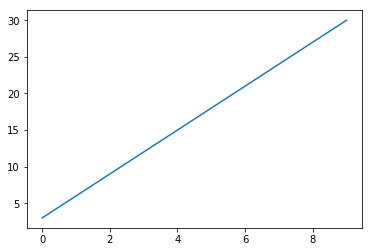

In [6]:
# What does .plot do? What does .show() do?
y_val = [a for a in range(3,31,3)]
plt.plot(y_val) # Only the y values are supplied. What does this do to the x values?
plt.show()

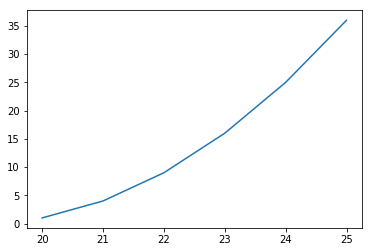

In [9]:
x_val = [20, 21, 22, 23, 24, 25]
y_val = [a**2 for a in range(1,7)]

# Is plt an object? 
# It seems that x_val and y_val is replacing the python list in the previous cell
# This means that you can 'refresh' the plot with new values.
plt.plot(x_val, y_val)
plt.show()

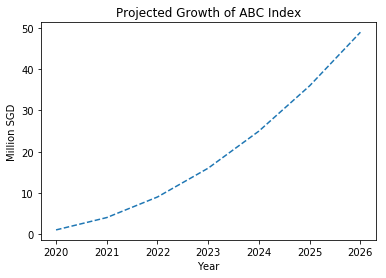

In [10]:
x_val = [2020, 2021, 2022, 2023, 2024, 2025, 2026]
y_val = [1, 4, 9, 16, 25, 36, 49]

# Note the notation. If not specifying the x and y arguments, the order follows x, y.
plt.plot(x_val, y_val, linestyle = "dashed")
plt.title('Projected Growth of ABC Index')
plt.xlabel('Year')
plt.ylabel('Million SGD')

plt.show()

#### plt object
Not all visualisations can (should) be done via the plt object. It provides a useful abstraction so that the user doesn't have to worry about the nitty gritty details. Of course, you can pass more detailed arguments to "tell" plt object to pass it along to the lower level objects (axes and fig).  

For example, plt.plot(x_val, y_val) is essentially making a function call to ax.plot(x_val, y_val). ax object allows you more flexibility in the kind of plots you want.

It's ok if you don't understand what I am talking about. Hopefully by the end of this volume you will have a good understand of plotting.  

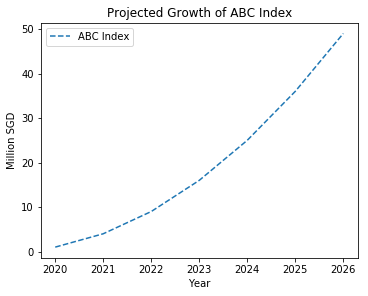

In [15]:
# Trying the above using the 'other' method -- using the fig and ax objects directly

fig, ax = plt.subplots(figsize = (5, 4), constrained_layout = True)
x_val = [2020, 2021, 2022, 2023, 2024, 2025, 2026]
y_val = [1, 4, 9, 16, 25, 36, 49]
# Same thing to create y_val via list comprehension
#y_val = [a**2 for a in range(1,8)]

ax.plot(x_val, y_val, linestyle = "dashed", label = "ABC Index") # added extra 'label' argument
ax.set_title('Projected Growth of ABC Index')
ax.set_xlabel('Year')
ax.set_ylabel('Million SGD')
ax.legend()

#### <a id = "VOL3_Part1Sect2"> Part 1 Section 2: Practical Examples </a>
[Return to top](#VOL3_toc)  [Return to section top](#VOL3_matplotlib)

Notice a few things here. 1) fig is created as a variable but is not 'used'. 2) ax seems to help settle loads of stuff relating to labels and titles (and legends too).  

Refer to this guide doc online here:  
- https://matplotlib.org/stable/tutorials/introductory/usage.html#a-simple-example  

Let's do more examples, shall we? This time using the hdb dataset so its practical.

In [16]:
df1 = df.copy()
df1.columns = map(str.upper, df1.columns)

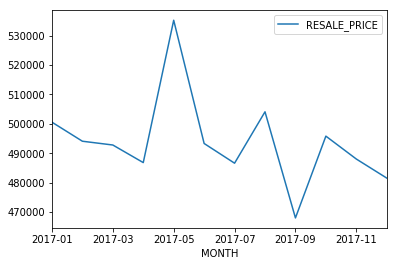

In [17]:
# AVERAGE Resale prices in 2017 in AMK, 4 room only
# Filter the dataset to what you want.
df1_amk = df1.loc[(df1["MONTH"].str.contains("2017")) &
                  (df1["TOWN"] == "ANG MO KIO") & 
                  (df1["FLAT_TYPE"] == "4 ROOM"), 
                  ["MONTH", "RESALE_PRICE"]]

df1_amk_avg = df1_amk.groupby(by = ["MONTH"]).mean()
#df1_amk_avg.head()

df1_amk_avg.plot(kind = "line")

Note that we are plotting via the pandas dataframe object (df1_amg_avg). You can also see that the object <matplotlib.axes._subplots.AxesSubplot at 0x...> titled above the plot.  

Without going into too much details, know that pandas dataframe allow you to plot basic stuff like line or scatter charts. Similarly, under the hood they make a function call to the axes object. The user can easily plot figures based on the dataframe created without writing the usual plotting code (as below).  

Of course, the usefulness is limited. For more flexibility, use fig and ax.

Text(0, 0.5, 'SGD')

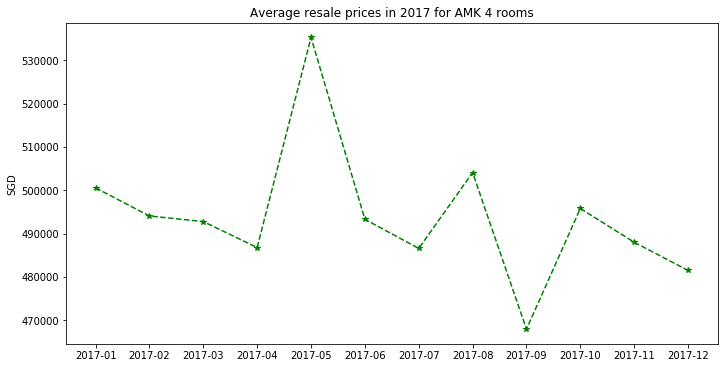

In [18]:
fig, ax = plt.subplots(figsize = (10, 5), constrained_layout = True)

ax.plot(df1_amk_avg.index, df1_amk_avg["RESALE_PRICE"], "*g--") # green dashed
ax.set_title('Average resale prices in 2017 for AMK 4 rooms')
#ax.set_xlabel('Year')
ax.set_ylabel('SGD')

Let's do for 3 room and 5 rooms. AND let's make it the median resale price. A simple way to do this is to group them by month and flat type, as you would do for excel's pivot tables. The mental process is simple: Slice according to condition, then summarize it (group by) then plot.

In [19]:
df1_amk_all = df1.loc[
#                      (df1["MONTH"].str.contains("2017")) &
                      (df1["TOWN"] == "ANG MO KIO") & 
                      (df1["FLAT_TYPE"].isin(["3 ROOM", "4 ROOM", "5 ROOM"])), 
                      ["MONTH", "FLAT_TYPE", "RESALE_PRICE"]]

df1_amk_all2 = df1_amk_all.groupby(by = ["MONTH", "FLAT_TYPE"]).quantile()
df1_amk_all2.head()

0.5                RESALE_PRICE
MONTH   FLAT_TYPE              
2017-01 3 ROOM         300500.0
        4 ROOM         437500.0
        5 ROOM         696500.0
2017-02 3 ROOM         315000.0
        4 ROOM         472000.0

In [20]:
df1_amk_all3 = df1_amk_all2.reset_index()

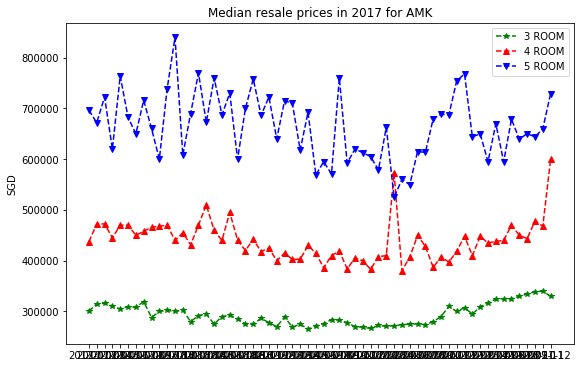

In [21]:
fig, ax = plt.subplots(figsize = (8, 5), constrained_layout = True)

# if finding it unreadable, consider doing all the computation before plotting
# like in this cell.
# Too repetitive? Think about how you can automate this via loops? What is the trade off? Especially if there are only a few categories to show?
xval = list(df1_amk_all3["MONTH"].unique())
yval1 = df1_amk_all3.loc[df1_amk_all3["FLAT_TYPE"] == "3 ROOM", "RESALE_PRICE"]
yval2 = df1_amk_all3.loc[df1_amk_all3["FLAT_TYPE"] == "4 ROOM", "RESALE_PRICE"]
yval3 = df1_amk_all3.loc[df1_amk_all3["FLAT_TYPE"] == "5 ROOM", "RESALE_PRICE"]

ax.plot(xval, yval1, "*g--", label = "3 ROOM")
ax.plot(xval, yval2, "^r--", label = "4 ROOM")
ax.plot(xval, yval3, "vb--", label = "5 ROOM")

ax.set_title('Median resale prices in 2017 for AMK')
#ax.set_xlabel('Year')
ax.set_ylabel('SGD')
ax.legend()

# Note that you can also tweak it around and do median prices in 2017 across towns
# Just need to label it properly.

#### See the x axis labels. How to we make that legible? See the next cell.

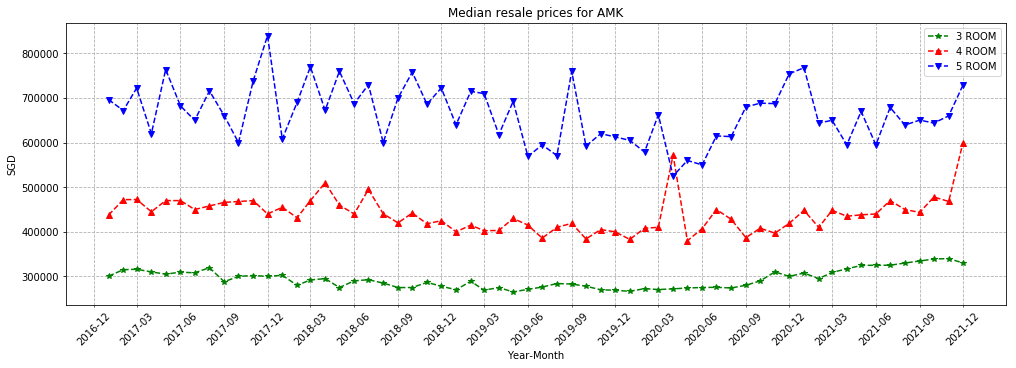

In [25]:
from datetime import datetime

newxval = [datetime.strptime(a, "%Y-%m") for a in xval]
fig, ax = plt.subplots(figsize = (14, 5), constrained_layout = True)

# if finding it unreadable, consider doing all the computation before plotting.
#xval = list(df1_amk_all3["MONTH"].unique())
yval1 = df1_amk_all3.loc[df1_amk_all3["FLAT_TYPE"] == "3 ROOM", "RESALE_PRICE"]
yval2 = df1_amk_all3.loc[df1_amk_all3["FLAT_TYPE"] == "4 ROOM", "RESALE_PRICE"]
yval3 = df1_amk_all3.loc[df1_amk_all3["FLAT_TYPE"] == "5 ROOM", "RESALE_PRICE"]

# These codes will set locators for major and minor ticks
# Notice the bymonth argument. Specifying the quarter will only plot the quarters instead of every month.

# You can comment out the set_minor codes and use the year locators. This will plot only the years.

#ax.xaxis.set_major_locator(mpl.dates.YearLocator())
#ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y'))

ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonth = (3,6,9,12)))
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%Y-%m'))

# Remove x axis major tick marks
ax.xaxis.set_major_locator(plt.NullLocator())

# Rotate tick labels. Major ticks are empty so only minor ticks will be rotated.
# Can also modify minor or major by changing the which keyword argument.
# See Axes.tick_params()
# grid() = parameters for gridlines.
ax.tick_params(axis = "x", which = "both", rotation = 45)
ax.grid(visible = True, which = "both", axis = "both", linestyle = "--")

# Actual plots. Can be a loop as well.
ax.plot(newxval, yval1, "*g--", label = "3 ROOM")
ax.plot(newxval, yval2, "^r--", label = "4 ROOM")
ax.plot(newxval, yval3, "vb--", label = "5 ROOM")

ax.set_title('Median resale prices for AMK')
ax.set_xlabel('Year-Month')
ax.set_ylabel('SGD')
ax.legend()

It may look like many lines of code, but note that each and every line of code is reusable. We know that the plot is just 2 objects: fig (controlling the layout of the eventual figure or picture) and axes (the plot itself). Each function (.tick_params, .grid, .xaxis.set_major_locator) affects a certain attribute of the plot.  

For example, we usually want some sort of gridlines. Then we also want some special formatting on our x-axis (dates maybe? Showing years or years-months). We also want to edit the actual lines and the colors. So all these are available in the reference website. For the examples here, I will make use of more parameters so you can simply copy and paste them in your own visualisations.  

If you wish to create a 'template' for your plots, can simply create a function and pass data for the function to *auto-plot* the figures. The key here is to tune your mind into what goes into the plots.

Enough on line plots. Line plots works best with a continuous variable (resale price in y) and discrete variable (months in x). To truly have a strong grasp on plotting, we need to understand which plot fits what kind of data. Not every data point requires a line plot, and it may be better to visualise it via a histogram, box plot or scatter plots.  

The choices are endless.

In [26]:
df1.head(2)

,MONTH,TOWN,FLAT_TYPE,BLOCK,STREET_NAME,STOREY_RANGE,FLOOR_AREA_SQM,FLAT_MODEL,LEASE_COMMENCE_DATE,REMAINING_LEASE,RESALE_PRICE
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0


Text(0, 0.5, 'SGD')

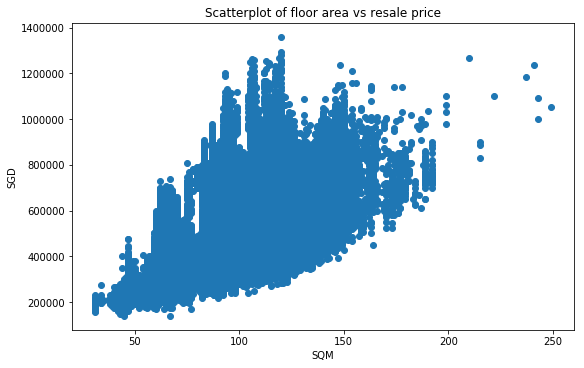

In [27]:
# Continuous vs continuous. SQM vs resale prices.
# Usually best represented via a scatter plot
fig, ax = plt.subplots(figsize = (8, 5), constrained_layout = True)

# if finding it unreadable, consider doing all the computation before plotting.
#xval = df1["FLOOR_AREA_SQM"]
#yval1 = df1.loc[df1["FLAT_TYPE"] == "3 ROOM", "RESALE_PRICE"]

ax.scatter(df1["FLOOR_AREA_SQM"], df1["RESALE_PRICE"])

ax.set_title('Scatterplot of floor area vs resale price')
ax.set_xlabel('SQM')
ax.set_ylabel('SGD')

What does the above plot tell us? Nothing much. Could it be that we are plotting on a very large dataframe? Should we slice it? Can we identify 3 and 4 and 5 rooms? Should we only look at year by year basis?

In [28]:
df1_2019 = df1.loc[df1["MONTH"].str.contains("2019"), :]

In [29]:
# For colors, we 'loan' a function from a package we will refer to later.
# This allows us to make a color palette so the colors look decent + easy to differentiate in plot
import seaborn as sns
colors = sns.color_palette(None, len(df1_2019["FLAT_TYPE"].unique()))
colors

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902)]

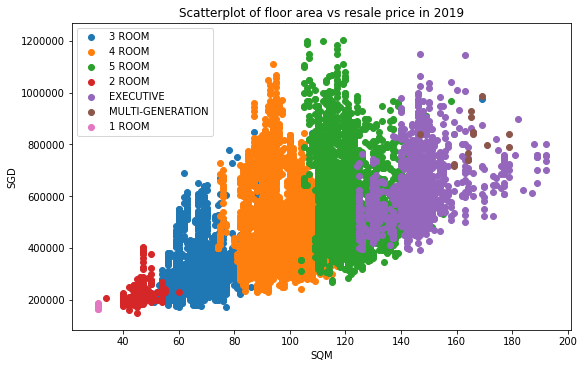

In [30]:
# Continuous vs continuous. SQM vs resale prices in 2021.
# This is because 2017 to 2020 prices exhibited an upward trend.
# Viewing SQM vs resale prices in totality will result in a large canvas like plot like above.
fig, ax = plt.subplots(figsize = (8, 5), constrained_layout = True)

# What do you think this is?
# What is enumerate(), idx and flattype?
# what is cmap?
for idx, flattype in enumerate(df1_2019["FLAT_TYPE"].unique()):
    xval = df1_2019.loc[df1_2019["FLAT_TYPE"] == flattype, "FLOOR_AREA_SQM"]
    yval = df1_2019.loc[df1_2019["FLAT_TYPE"] == flattype, "RESALE_PRICE"]
    ax.scatter(xval, yval, cmap = colors[idx], label = flattype)

ax.set_title('Scatterplot of floor area vs resale price in 2019')
ax.set_xlabel('SQM')
ax.set_ylabel('SGD')
ax.legend() # Question for you: how does ax.legend() know which color = which flat type?

This plot tells such a different story right? There is *so* much information and questions to unpack. Here's a few:  

- Are the price different across towns? How do we visualise that (too many towns right now)?  
- Can we segment resale transactions across regions?  
- Even within 4 room for eg. there are different models (A, Improved). Is it important to separate it?  
- Remaining lease years are not accounted for. Is it an important point to analyse?  
- What should we do about outliers (see 5-Room Executive)?

A few more ways to explore the data... Notice that courses don't usually teach this. Contextual understand of the dataset and the domain (local housing market) is important here to suss out what kind of insights we should explore further.

In [31]:
df1_lease = df1.copy()

In [32]:
# Let's visualise lease years. First we need to derive the 'age' of the flat.
# This can be extracted from the remaining lease column.
# We also don't want to visualise all years from say 60 to 94 years. 
# That will be 35 categories, which is quite excessive.
df1_lease["REMAIN_YEARS"] = df1_lease["REMAINING_LEASE"].str.split(" ").str[0]
df1_lease["REMAIN_GROUP"] = df1_lease["REMAIN_YEARS"].astype(int)

mapping = {}
for i in range(30, 99):
    
    if i % 5 != 0:
        nearest_multiple = 5 * round(i/5)
        mapping[i] = nearest_multiple
        
# This will make 61 and 62 = 60, 63 to 67 to 65, 68 to 72 = 70

df1_lease["REMAIN_GROUP"] = df1_lease["REMAIN_GROUP"].replace(mapping)
df1_lease["REMAIN_GROUP"].unique()

array([60, 65, 95, 80, 70, 55, 85, 90, 75, 50, 45,  0], dtype=int64)

In [33]:
# Found an erroenous entry.
# You can either remove it now or make a note to remove it before the model selection phase.
# This can be done with another column i.e. "TO_REMOVE".
df1_lease.loc[df1_lease["REMAIN_GROUP"] < 40, :]

,MONTH,TOWN,FLAT_TYPE,BLOCK,STREET_NAME,STOREY_RANGE,FLOOR_AREA_SQM,FLAT_MODEL,LEASE_COMMENCE_DATE,REMAINING_LEASE,RESALE_PRICE,REMAIN_YEARS,REMAIN_GROUP
64576,2020-12,ANG MO KIO,3 ROOM,425,ANG MO KIO AVE 3,01 TO 03,73.0,New Generation,1979,00 years,310000.0,00,0


Text(0, 0.5, 'Number of transactions')

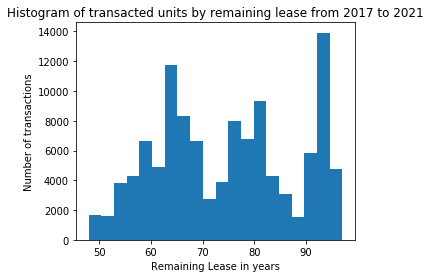

In [36]:
# Let's say we are only interested in leases that are at least 50 years old. Let's visualize that.
# The constrained_layout argument is missing here. Why is that? Try it with the argument and see what happens?
fig, ax = plt.subplots(figsize = (5, 4))

data = df1_lease.loc[df1_lease["REMAIN_GROUP"] > 49, "REMAIN_YEARS"]

ax.hist(data.astype(int), bins = 20)
ax.set_title('Histogram of transacted units by remaining lease from 2017 to 2021')
ax.set_xlabel('Remaining Lease in years')
ax.set_ylabel('Number of transactions')

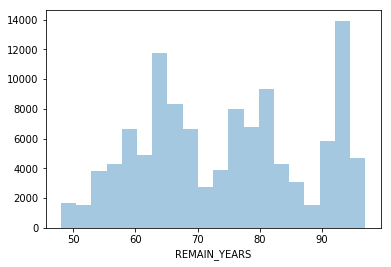

In [37]:
# Same function from a future package. Note that the output is still of matplotlib's axes object.
# We will dive into this later.
sns.distplot(data.astype(int), kde=False, bins=20)

In [40]:
df1_overyrs = df1.loc[df1["TOWN"] == "PUNGGOL", :].reset_index(drop=True).copy()

In [41]:
# Need to do some transformation to get years.
df1_overyrs["YEAR"] = list(df1_overyrs["MONTH"].str.split("-").str[0])

In [42]:
df1_overyrs["FLAT_TYPE"].unique()

array(['4 ROOM', '5 ROOM', 'EXECUTIVE', '3 ROOM', '2 ROOM'], dtype=object)

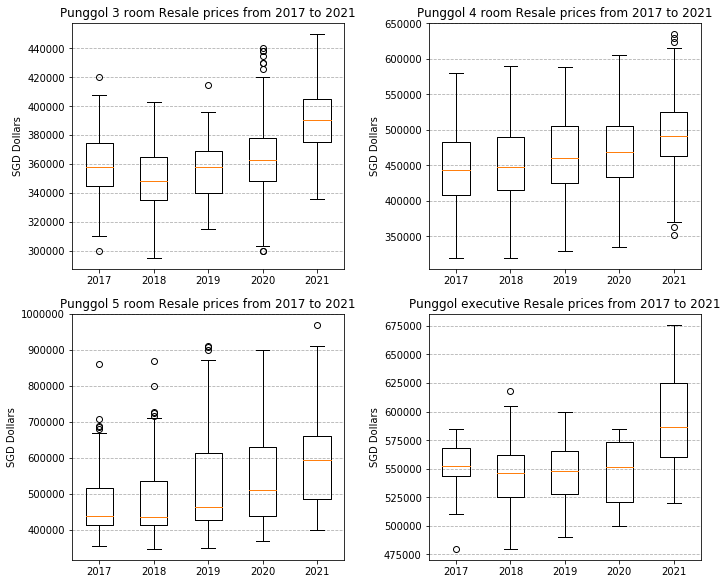

In [44]:
# Boxplot of different room types by region. Here we will examine how the distribution of prices have changed over the years.
# For 3 4 5 rooms + executive. This will be shown in a pic of 4.

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (10, 8), constrained_layout = True)

# This is a list of 4 lists. They are empty. 
# But each inner list will be used to fill up the data points of e.g. 3 room over 2017 to 2021.
# The first list will look like:
# [[[3rm_2017], [3rm_2018], [3rm_2019], [3rm_2020], [3rm_2021]], [], [], []]
# This makes it easy to iterate.
boxp = [[], [], [], []]

labels = ["3 ROOM", "4 ROOM", "5 ROOM", "EXECUTIVE"]
yrs = ["2017", "2018", "2019", "2020", "2021"]
for yr in ["2017", "2018", "2019", "2020", "2021"]:
    boxp[0].append(df1_overyrs.loc[(df1_overyrs["FLAT_TYPE"] == labels[0]) & 
                                       (df1_overyrs["YEAR"] == yr), "RESALE_PRICE"])
    
    boxp[1].append(df1_overyrs.loc[(df1_overyrs["FLAT_TYPE"] == labels[1]) & 
                                       (df1_overyrs["YEAR"] == yr), "RESALE_PRICE"])
        
    boxp[2].append(df1_overyrs.loc[(df1_overyrs["FLAT_TYPE"] == labels[2]) & 
                                       (df1_overyrs["YEAR"] == yr), "RESALE_PRICE"])
    
    boxp[3].append(df1_overyrs.loc[(df1_overyrs["FLAT_TYPE"] == labels[3]) & 
                                       (df1_overyrs["YEAR"] == yr), "RESALE_PRICE"])

# enumerate provides both index and element of the iterable you're iterating over.
for idx, ax in enumerate([ax1, ax2, ax3, ax4]):
    ax.boxplot(boxp[idx])
    ax.set_xticklabels(yrs) # Make all x labels from 2017 to 2021
    ax.set_title("Punggol {} Resale prices from {} to {}".format(labels[idx].lower(), yrs[0], yrs[-1]))
    ax.set_ylabel("SGD Dollars")
    ax.grid(visible = True, which = "both", axis = "y", linestyle = "--")
    

# This may take some time to digest and swallow.
# Try and slowly figure out why I'm using list of lists.
# You can of course do it manually without loops.
# Boxplot function from matplotlib accepts data points only. Hence, we give in a list-like object.
# Pandas' series are a list-like object.

Let's try to visualize some other data points.

In [49]:
# Distribution of flat types transacted over years (and months?)
# This should sum up to 1 (100 percent = 1.00)
df_flat_dist = df1.copy()
df_flat_grp = df_flat_dist.groupby(by = "MONTH")["FLAT_TYPE"].value_counts(normalize = True).reset_index(name = "PERCENTAGE")

In [50]:
df_flat_grp.head()

,MONTH,FLAT_TYPE,PERCENTAGE
0,2017-01,4 ROOM,0.421941
1,2017-01,3 ROOM,0.280169
2,2017-01,5 ROOM,0.216034
3,2017-01,EXECUTIVE,0.066667
4,2017-01,2 ROOM,0.015190


In [51]:
len(df_flat_grp.loc[df_flat_grp["FLAT_TYPE"] == "EXECUTIVE", :])

60

Text(0, 0.5, 'Proportion (%)')

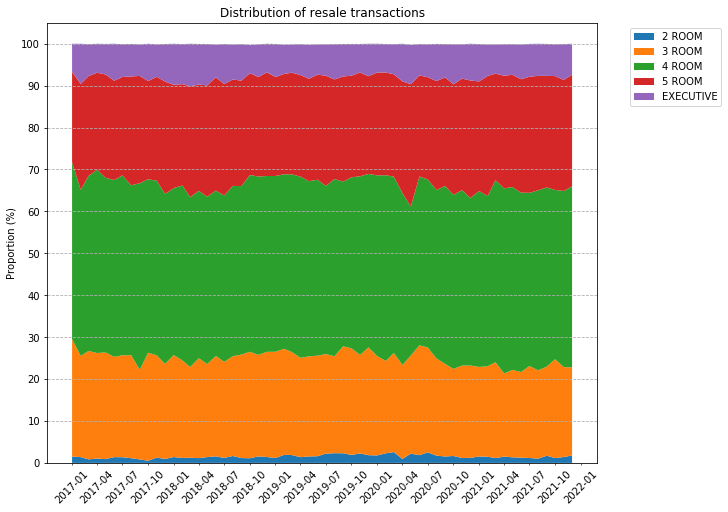

In [52]:
fig, ax = plt.subplots(figsize = (10, 7), constrained_layout = True)

# Take out individual dates. Then parse them based on the format you want.
# Then format them below.
x = list(df_flat_grp["MONTH"].unique())
newxval = [datetime.strptime(a, "%Y-%m") for a in x]

labels = ["2 ROOM", "3 ROOM", "4 ROOM", "5 ROOM", "EXECUTIVE"]

# Check if labels are all same length? FOr example some months may not have 2 room sales.
y = []
for rm in labels:
    yvals = list(df_flat_grp.loc[df_flat_grp["FLAT_TYPE"] == rm, "PERCENTAGE"])
    y.append([a*100 for a in yvals])
    
ax.stackplot(newxval, y)

# Copied from above cells.
# You can comment out the set_minor codes and use the year locators. This will plot only the years.

#ax.xaxis.set_major_locator(mpl.dates.YearLocator())
#ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonth = (1,4,7,10)))
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%Y-%m'))

# Remove x axis major tick marks
ax.xaxis.set_major_locator(plt.NullLocator())

ax.yaxis.set_ticks([a for a in range(0, 101, 10)])

ax.grid(visible = True, which = "both", axis = "y", linestyle = "--")
# Rotate tick labels. Major ticks are empty so only minor ticks will be rotated.
# Can also modify minor or major by changing the which keyword argument.
# See Axes.tick_params()
ax.tick_params(axis = "x", which = "both", rotation = 45)

ax.set_title("Distribution of resale transactions")
ax.legend(labels, bbox_to_anchor = (1.05, 1), loc = "upper left") # To shift the legend out of the plot.
ax.set_ylabel("Proportion (%)")
# This is based on order. If 2 rooms are plotted first (see y.append) and labels list is diff, then the order will be different.

Shame that the above plot is not as insightful. But, it's a template for you to copy. Useful to show % contribution like market share over time. Kind of like major players in a sector, perhaps based on key aggregates like output/VA.  

Thanks for reading. Jump over to HELPER_VOL3A to a deeper dive into plots via the seaborn package.  

Otherwise, please head over to HELPER_VOL4 for the next phase of the data science project.